In [105]:
import torch
import torchvision

from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

Download MNIST

In [106]:
dataset = MNIST(root='data/', download=True)

Get test dataset only

In [107]:
print(len(dataset))

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

60000
10000


In [108]:
test_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F16FEEDC710>, 7)

MNIST we download are PIL.Image object
Though we can Display it
however we can't just put into learning model

Label: 5


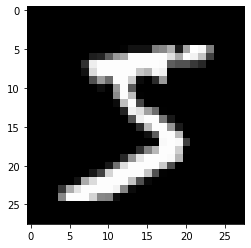

In [109]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

## torchvision.transforms
make the MNIST PIL.image object to value data(tensors)

In [110]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [111]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


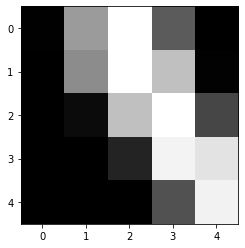

In [112]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Split dataset to 3 parts
1. Training set
2. Validation set
3. Testing Set

## Split validation and training by hand
And we shuffle the data first(by index)

In [113]:
import numpy as np

def spilit_indices(n, val_percent):

    validation_n = int(val_percent * n)

    # just shuffle the list of [0,1,...,n-1]
    idxs = np.random.permutation(n)

    # [n : ] skip first n
    # [ : n] from 0 to n
    return idxs[validation_n:], idxs[:validation_n]

In [114]:
train_indices, validation_indices = spilit_indices(len(dataset), val_percent=0.2)

print(len(train_indices), len(validation_indices))
print('Smaple validation indices: ', validation_indices[:20])

48000 12000
Smaple validation indices:  [20653  3064 35647 14774 45878 45664   986 38396 54585 29738 21554 42249
 12253 15214 12531 54810  4952 34688 41226 54257]


`SubsetRandomSampler` using indices to sample data
and randomly, so the shuffle indices might be redundant.

In [115]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 100

# Combine sampler(using indices) and data loader
# Training
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

# Validation
val_sampler = SubsetRandomSampler(validation_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler=val_sampler)

## split data using utils
`torch.utils.data.random_split`

can split dataset into validation set and training set as well

In [116]:
# Spliting Training and Validation datasets
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [117]:
# DataLoader
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=True)

## Logistic regression model
* almost like linear regression
* we **flatten** the 1x28x28 image tensor to 784
* output is vector of size 10, signifying the probability of target label(from 0 to 9)

In [118]:
import torch.nn as nn

input_size = 1*28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [119]:
# checkout the weight and bias
print("weight:")
print(model.weight.shape)
print(model.weight)

print()
print('bias:')
print(model.bias.shape)
print(model.bias)


weight:
torch.Size([10, 784])
Parameter containing:
tensor([[-0.0347, -0.0301, -0.0073,  ...,  0.0262,  0.0319,  0.0213],
        [ 0.0260,  0.0300,  0.0127,  ..., -0.0169,  0.0012,  0.0079],
        [-0.0166, -0.0157,  0.0162,  ...,  0.0108, -0.0077, -0.0246],
        ...,
        [-0.0229, -0.0093,  0.0236,  ..., -0.0345, -0.0288,  0.0030],
        [ 0.0309,  0.0052, -0.0119,  ..., -0.0258,  0.0255, -0.0114],
        [ 0.0062, -0.0209, -0.0189,  ...,  0.0334, -0.0210, -0.0031]],
       requires_grad=True)

bias:
torch.Size([10])
Parameter containing:
tensor([ 0.0130, -0.0276, -0.0009, -0.0019,  0.0214, -0.0306, -0.0144,  0.0006,
         0.0266,  0.0258], requires_grad=True)


In [120]:
# print every label
for images, labels in train_loader:
    print(labels)
    print(images.shape)

    # because the size of input has not been flatten
    outputs = model(images)
    break

tensor([0, 5, 7, 4, 8, 5, 6, 0, 8, 8, 0, 4, 4, 3, 3, 5, 4, 3, 3, 1, 2, 5, 6, 3,
        5, 4, 3, 3, 9, 4, 9, 7, 6, 9, 6, 1, 3, 3, 1, 1, 4, 7, 2, 8, 5, 9, 6, 6,
        9, 1, 3, 4, 3, 6, 9, 7, 8, 9, 3, 9, 2, 6, 0, 9, 8, 0, 8, 0, 7, 7, 1, 6,
        6, 4, 4, 9, 7, 1, 2, 8, 0, 6, 9, 1, 2, 9, 1, 8, 3, 3, 6, 0, 0, 4, 6, 5,
        1, 3, 9, 2, 2, 2, 9, 1, 1, 4, 9, 4, 1, 3, 1, 3, 4, 6, 7, 2, 2, 2, 9, 1,
        0, 6, 0, 2, 1, 2, 9, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [121]:
# we make a model wrap linear model
# and we flatten first and put into linear model after
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):

        # -1 means x, a variable
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)

        return out

model = MnistModel()

In [122]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Smaple outputs : \n', outputs[0])

outputs.shape :  torch.Size([128, 10])
Smaple outputs : 
 tensor([ 0.3996, -0.3318, -0.1151,  0.2781, -0.0193,  0.2117, -0.1346,  0.3927,
        -0.1248, -0.0184], grad_fn=<SelectBackward>)


The output we expect to get is the probabilities.
However, the output here significantly is not probabilities.

So we can put it into **Softmax**
Convert logic score to probabilities.

In [123]:
import  torch.nn.functional as F

probs = F.softmax(outputs, dim=1)
# checkout sample prob.
print("Sample prob : \n", probs[0].data)

# add up the prob of an output row
# verify if equal to 1
print('Sum: ', torch.sum(probs[0]).item())

Sample prob : 
 tensor([0.1374, 0.0661, 0.0821, 0.1216, 0.0903, 0.1138, 0.0805, 0.1364, 0.0813,
        0.0904])
Sum:  1.0


In [124]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 7, 7, 3, 3, 5, 7, 1, 5, 0, 0, 3, 7, 5, 3, 7, 3, 7, 3, 7, 3, 3, 3, 3,
        3, 7, 7, 3, 3, 7, 3, 3, 7, 7, 7, 7, 7, 3, 5, 3, 7, 4, 0, 3, 3, 3, 3, 7,
        7, 3, 8, 3, 7, 3, 3, 3, 7, 3, 9, 3, 3, 5, 0, 0, 7, 0, 3, 7, 3, 7, 7, 3,
        7, 7, 3, 3, 0, 3, 8, 3, 7, 3, 3, 3, 3, 3, 3, 7, 7, 1, 7, 0, 7, 3, 0, 3,
        3, 8, 7, 3, 7, 9, 3, 3, 3, 3, 0, 0, 7, 7, 3, 0, 7, 7, 3, 3, 4, 3, 2, 3,
        7, 7, 0, 3, 7, 3, 3, 3])
tensor([0.1374, 0.1346, 0.1408, 0.1430, 0.1759, 0.1287, 0.1491, 0.1297, 0.1295,
        0.1488, 0.1245, 0.1361, 0.1195, 0.1434, 0.1724, 0.1367, 0.1552, 0.1460,
        0.1404, 0.1354, 0.1530, 0.1535, 0.1634, 0.1757, 0.1238, 0.1509, 0.1594,
        0.1715, 0.1443, 0.1360, 0.1505, 0.1226, 0.1658, 0.1400, 0.1455, 0.1237,
        0.1238, 0.1600, 0.1205, 0.1470, 0.1545, 0.1332, 0.1310, 0.1549, 0.1239,
        0.1488, 0.1498, 0.1604, 0.1280, 0.1550, 0.1299, 0.1525, 0.1317, 0.1765,
        0.1415, 0.2003, 0.1270, 0.1539, 0.1621, 0.1536, 0.1623, 0.1390, 0.1531,
       

## Evaluation Metric and Loss
we use accuracy here for evaluation metric.

acc is a great way for humans to evaluate model
however it can't use as a loss function by non-differentiable.

so we use **Cross entropy** in real loss function

In [125]:
def accuracy(label_pred, label_targ):
    return torch.sum(label_pred == label_targ).item() / len(label_pred)

accuracy(preds, labels)

0.0703125

In [126]:
loss_fn = F.cross_entropy

# F.cross_entropy average all the cross entropy of output
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3844, grad_fn=<NllLossBackward>)


## Optimizer
`optim.SGD` here

In [127]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Calculate Loss and Evaluate

In [145]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):

    preds = model(xb)
    loss = loss_func(preds, yb)
    # loss_func return a 1d tensor
    # we can get value by loss.item()

    if opt is not None:
        # compute gradient
        loss.backward()
        # optimizer upgrade params
        opt.step()
        # reset gradient
        opt.zero_grad()

    metric_result = None
    if metric is not None:

        metric_result = metric(preds, yb)

    return loss.item(), len(xb), metric_result

In [152]:
def evaluate(model, loss_func, valid_dataloader, metric=None):
    # temporarily set requires_grad to false
    with torch.no_grad():

        # results is a list of results
        # results = [(loss, len of batch ,metric) ... ]
        results = [loss_batch(model, loss_func, xb, yb, metric=metric)
                    for xb, yb in valid_dataloader]

        # take one list of 3 element tuple (loss, len, metric)
        # to 3 list
        losses, nums, metrics = zip(*results)

        total= np.sum(nums)

        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:

            avg_metric = np.sum(np.multiply(metrics, nums)) / total

        return avg_loss, total, avg_metric

In [130]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [150]:
val_loss, total, val_acc = evaluate(model, loss_fn,val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.2f}%'.format(val_loss, val_acc*100))

Loss: 1.1939, Accuracy: 81.04%


## Training

In [132]:
def fit(epochs, model, loss_fn, opt, train_dataloader, valid_dataloader, metric=None):
    for epoch in range(epochs):
        # Training
        for xb, yb in train_dataloader:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dataloader, metric)
        val_loss, total, val_metric = result

        # print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, epochs, val_loss))

        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                    .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [153]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

fit(epochs=5,
    model=model,
    loss_fn=F.cross_entropy,
    opt=optimizer,
    train_dataloader=train_loader,
    valid_dataloader=val_loader,
    metric=accuracy)


Epoch [1/5], Loss: 1.9680, accuracy: 0.5521
Epoch [2/5], Loss: 1.6934, accuracy: 0.7249
Epoch [3/5], Loss: 1.4875, accuracy: 0.7677
Epoch [4/5], Loss: 1.3318, accuracy: 0.7906
Epoch [5/5], Loss: 1.2121, accuracy: 0.8058


## Testing Single IMAGE

In [134]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

In [135]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 Predicted: 7
Label: 0 Predicted: 0
Label: 9 Predicted: 7
Label: 6 Predicted: 6
Label: 2 Predicted: 7


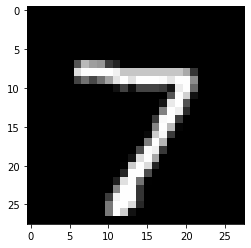

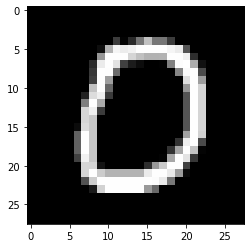

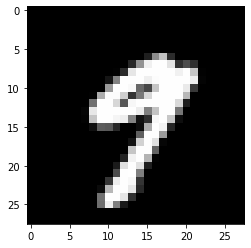

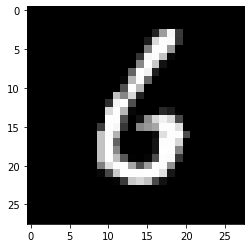

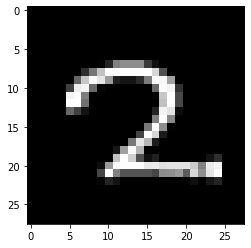

In [136]:
test_index = [0, 10, 20, 50, 77]

for i in test_index:
    img, label = test_dataset[i]
    plt.figure()
    plt.imshow(img[0], cmap='gray')
    print('Label:', label, 'Predicted:', predict_image(img, model) )

## Get final test result

In [137]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model,
                  loss_func=loss_fn,
                  valid_dataloader=test_loader,
                  metric=accuracy)

print(result)
print('Acc: {:.2f}%'.format(result[2]*100))

tensor(1.2483)
tensor(1.2690)
tensor(1.2672)
tensor(1.2134)
tensor(1.3515)
tensor(1.2967)
tensor(1.3179)
tensor(1.2690)
tensor(1.3504)
tensor(1.2549)
tensor(1.2626)
tensor(1.2342)
tensor(1.2422)
tensor(1.2766)
tensor(1.3124)
tensor(1.2617)
tensor(1.2980)
tensor(1.2981)
tensor(1.2568)
tensor(1.1955)
tensor(1.0410)
tensor(1.0316)
tensor(1.0614)
tensor(1.1816)
tensor(0.9091)
tensor(1.1827)
tensor(1.1883)
tensor(1.0636)
tensor(1.1163)
tensor(1.2408)
tensor(1.0151)
tensor(0.9845)
tensor(1.1326)
tensor(0.9758)
tensor(0.8823)
tensor(1.1036)
tensor(1.0624)
tensor(1.1760)
tensor(1.3915)
tensor(1.0143)
(1.1847789430618285, 10000, 0.8131)
Acc: 81.31%


## Save the model

In [138]:
model_file_name = 'mnist-logistic.pth'
torch.save(model.state_dict(), model_file_name)
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[-0.0264, -0.0056, -0.0250,  ...,  0.0090,  0.0248,  0.0032],
        [ 0.0052, -0.0100,  0.0231,  ..., -0.0211,  0.0235, -0.0266],
        [-0.0311, -0.0286, -0.0323,  ...,  0.0209,  0.0158,  0.0267],
        ...,
        [ 0.0016,  0.0218,  0.0058,  ..., -0.0267, -0.0077, -0.0240],
        [ 0.0088, -0.0313,  0.0114,  ..., -0.0175, -0.0028,  0.0047],
        [-0.0187,  0.0203, -0.0165,  ..., -0.0348,  0.0162, -0.0183]])), ('linear.bias', tensor([ 0.0065,  0.0107, -0.0078, -0.0085,  0.0108, -0.0102,  0.0034,  0.0156,
        -0.0098,  0.0006]))])


In [139]:
model_origin = MnistModel()
print(model_origin.state_dict())

origin_met = evaluate(model_origin,
                  loss_func=loss_fn,
                  valid_dataloader=test_loader,
                  metric=accuracy)
print('Origin Acc: {:.2f}%'.format(origin_met[2]*100))

print()
model_origin.load_state_dict(torch.load(model_file_name))
print(model_origin.state_dict())

origin_met = evaluate(model_origin,
                  loss_func=loss_fn,
                  valid_dataloader=test_loader,
                  metric=accuracy)
print('Loaded Acc: {:.2f}%'.format(origin_met[2]*100))

OrderedDict([('linear.weight', tensor([[-0.0132, -0.0104, -0.0161,  ...,  0.0347,  0.0269,  0.0281],
        [ 0.0023, -0.0124, -0.0353,  ...,  0.0222,  0.0188,  0.0083],
        [ 0.0322, -0.0269, -0.0051,  ..., -0.0013,  0.0223,  0.0067],
        ...,
        [-0.0176, -0.0015, -0.0101,  ...,  0.0033,  0.0297,  0.0320],
        [-0.0347,  0.0138, -0.0045,  ..., -0.0010,  0.0239, -0.0054],
        [ 0.0196,  0.0295, -0.0173,  ...,  0.0246, -0.0071,  0.0124]])), ('linear.bias', tensor([ 0.0138, -0.0223,  0.0276,  0.0245,  0.0177, -0.0143,  0.0182,  0.0046,
         0.0051,  0.0173]))])
tensor(2.2995)
tensor(2.2681)
tensor(2.2853)
tensor(2.2688)
tensor(2.2968)
tensor(2.2626)
tensor(2.2877)
tensor(2.2849)
tensor(2.2796)
tensor(2.2647)
tensor(2.2727)
tensor(2.2880)
tensor(2.2776)
tensor(2.2821)
tensor(2.2776)
tensor(2.2823)
tensor(2.2782)
tensor(2.2861)
tensor(2.2862)
tensor(2.2702)
tensor(2.2620)
tensor(2.2650)
tensor(2.2539)
tensor(2.2485)
tensor(2.3063)
tensor(2.2977)
tensor(2.3074)
te

In [140]:
# TEST GPU
import torch

print('Cuda availability :',torch.cuda.is_available())
print('How many cuda device :', torch.cuda.device_count())
cuda_device = torch.cuda.current_device()
print('Name of current device :',torch.cuda.get_device_name(cuda_device))

Cuda availability : True
How many cuda device : 1
Name of current device : NVIDIA GeForce RTX 3090
